# **10.6.15**

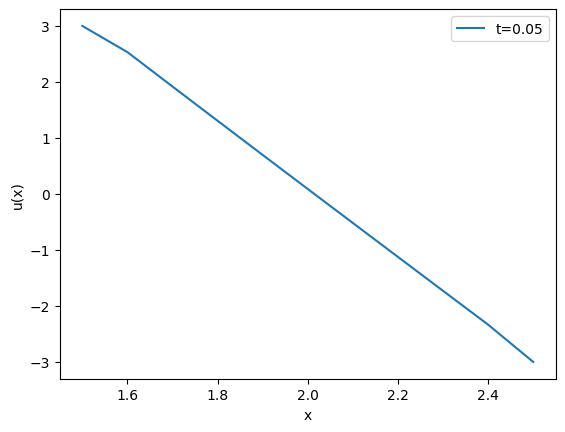

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры задачи
a, b = 1.5, 2.5  # Границы по x
tau = 0.05  # Шаг по времени
T0, T = 0, 1  # Время начала и конца
ua, ub = 3, -3  # Граничные условия
h = 0.1  # Шаг по пространству
Nx = int(round((b - a)/h))
x = np.linspace(a, b, Nx + 1)  # Массив значений по x
l = b - a

# Функции для уравнения
f = lambda x, t: (x + np.sqrt(x)) * (1 - np.exp(-t))
k = lambda x: x ** (-1/3)
phi = lambda x: (ub - ua)*(x - a)/l + ua

def solver_Ex_simple(tt):
    """
    Реализация явной разностной схемы для приближенного решения
    параболического уравнения для произвольного момента времени tt.
    """

    Nt = int(T / tau)
    u = np.zeros(Nx + 1) # Итоговый результат
    u_n = np.zeros(Nx + 1) # Шаговой результат
    t = np.linspace(T0, T, Nt+1)

    # Устанавливаем начальные условия u(x,0) = phi(x)
    for i in range(0, Nx + 1):
        u_n[i] = phi(x[i])

    # Прокручиваем временные шаги до времени tt
    for n in range(1, Nt):
        current_time = n * tau  # Текущее время
        if current_time > tt:
            break  # Если текущее время больше заданного tt, останавливаем цикл

        # Вычисляем приближенное решение во внутренних узлах сетки
        for i in range(1, Nx):
            u[i] = u_n[i] + tau * (k(x[i+1]) * u_n[i+1] - 2 * k(x[i]) * u_n[i] + k(x[i-1]) * u_n[i-1]) / (h**2) + tau * f(x[i], current_time)

        # Граничные условия
        u[0] = ua
        u[Nx] = ub

        # Обновляем переменные перед следующим шагом
        u_n, u = u, u_n

    return u_n, x

# Тестирование при разных временных шагах
u, x = solver_Ex_simple(tau)
plt.plot(x, u, label=f't={tau}')

plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.show()


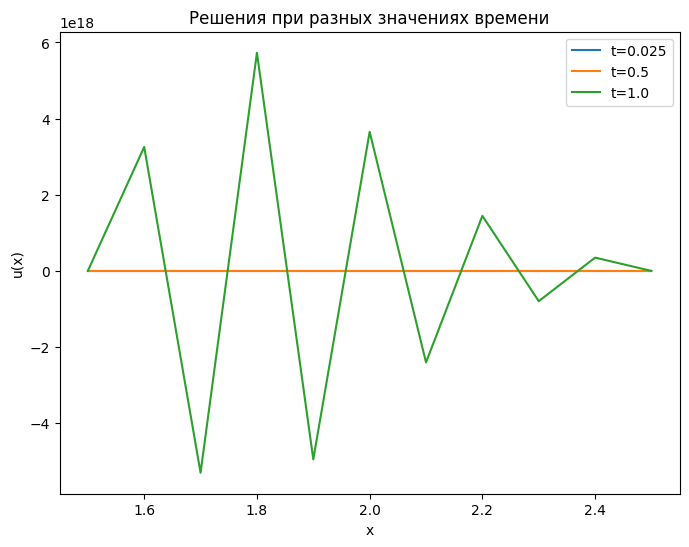

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры задачи
a, b = 1.5, 2.5  # Границы по x
tau = 0.05  # Шаг по времени
T0, T = 0, 1  # Время начала и конца
ua, ub = 3, -3  # Граничные условия
h = 0.1  # Шаг по пространству
Nx = int(round((b - a)/h))
x = np.linspace(a, b, Nx + 1)  # Массив значений по x
l = b - a

# Функции для уравнения
f = lambda x, t: (x + np.sqrt(x)) * (1 - np.exp(-t))
k = lambda x: x ** (-1/3)
phi = lambda x: (ub - ua)*(x - a)/l + ua

def solver_Ex_simple(tt):
    """
    Реализация явной разностной схемы для приближенного решения
    параболического уравнения для произвольного момента времени tt.
    """

    Nt = int(T / tau)
    u = np.zeros(Nx + 1) # Итоговый результат
    u_n = np.zeros(Nx + 1) # Шаговой результат
    t = np.linspace(T0, T, Nt+1)

    # Устанавливаем начальные условия u(x,0) = phi(x)
    for i in range(0, Nx + 1):
        u_n[i] = phi(x[i])

    # Прокручиваем временные шаги до времени tt
    for n in range(1, Nt):
        current_time = n * tau  # Текущее время
        if current_time > tt:
            break  # Если текущее время больше заданного tt, останавливаем цикл

        # Вычисляем приближенное решение во внутренних узлах сетки
        for i in range(1, Nx):
            u[i] = u_n[i] + tau * (k(x[i+1]) * u_n[i+1] - 2 * k(x[i]) * u_n[i] + k(x[i-1]) * u_n[i-1]) / (h**2) + tau * f(x[i], current_time)

        # Граничные условия
        u[0] = ua
        u[Nx] = ub

        # Обновляем переменные перед следующим шагом
        u_n, u = u, u_n

    return u_n, x

# Значения времени, при которых нужно построить графики
time_values = [0.5 * tau, 10 * tau, 20 * tau]

# Построение решений при разных значениях времени
plt.figure(figsize=(8,6))

for t_value in time_values:
    u, x = solver_Ex_simple(t_value)
    plt.plot(x, u, label=f't={t_value}')

plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('Решения при разных значениях времени')
plt.show()

In [30]:
# Пересчитаем tau на основе условия Куранта
k_max = np.max(k(x))  # Максимальное значение функции теплопроводности
tau_new = 0.4 * h**2 / k_max  # Скорректированный шаг по времени

# Обновим tau на новое значение
tau = tau_new
print(f"Новый шаг по времени (tau): {tau}")

Новый шаг по времени (tau): 0.004578856970213328


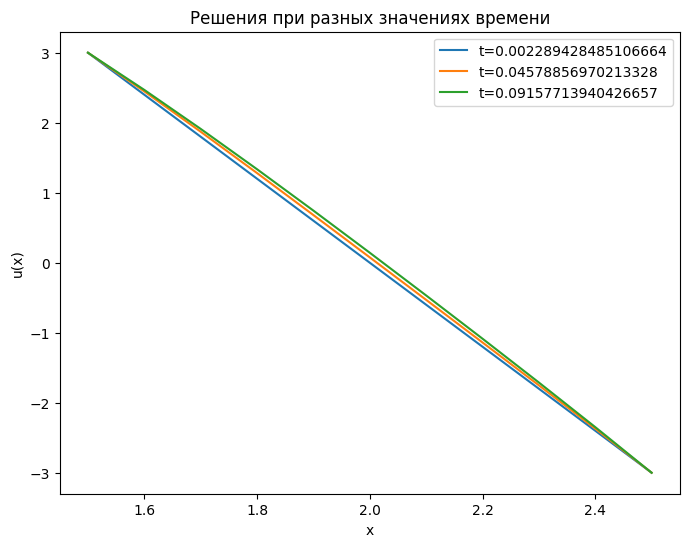

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры задачи
a, b = 1.5, 2.5  # Границы по x
h = 0.1  # Шаг по пространству
ua, ub = 3, -3  # Граничные условия
Nx = int(round((b - a)/h))
x = np.linspace(a, b, Nx + 1)  # Массив значений по x
l = b - a

# Функции для уравнения
f = lambda x, t: (x + np.sqrt(x)) * (1 - np.exp(-t))
k = lambda x: x ** (-1/3)
phi = lambda x: (ub - ua)*(x - a)/l + ua

# Пересчитаем tau на основе условия Куранта
k_max = np.max(k(x))  # Максимальное значение функции теплопроводности
tau = 0.4 * h**2 / k_max  # Скорректированный шаг по времени
T0, T = 0, 1  # Время начала и конца

def solver_Ex_simple(tt):
    """
    Реализация явной разностной схемы для приближенного решения
    параболического уравнения для произвольного момента времени tt.
    """

    Nt = int(T / tau)
    u = np.zeros(Nx + 1) # Итоговый результат
    u_n = np.zeros(Nx + 1) # Шаговой результат
    t = np.linspace(T0, T, Nt+1)

    # Устанавливаем начальные условия u(x,0) = phi(x)
    for i in range(0, Nx + 1):
        u_n[i] = phi(x[i])

    # Прокручиваем временные шаги до времени tt
    for n in range(1, Nt):
        current_time = n * tau  # Текущее время
        if current_time > tt:
            break  # Если текущее время больше заданного tt, останавливаем цикл

        # Вычисляем приближенное решение во внутренних узлах сетки
        for i in range(1, Nx):
            u[i] = u_n[i] + tau * (k(x[i+1]) * u_n[i+1] - 2 * k(x[i]) * u_n[i] + k(x[i-1]) * u_n[i-1]) / (h**2) + tau * f(x[i], current_time)

        # Граничные условия
        u[0] = ua
        u[Nx] = ub

        # Обновляем переменные перед следующим шагом
        u_n, u = u, u_n

    return u_n, x

# Значения времени, при которых нужно построить графики
time_values = [0.5 * tau, 10 * tau, 20 * tau]

# Построение решений при разных значениях времени
plt.figure(figsize=(8,6))

for t_value in time_values:
    u, x = solver_Ex_simple(t_value)
    plt.plot(x, u, label=f't={t_value}')

plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('Решения при разных значениях времени')
plt.show()


In [24]:
import scipy.sparse as sps
import scipy.sparse.linalg
import imageio.v2 as imageio
from tqdm import trange

# Параметры задачи
T0, T = 0, tau * 100  # Время начала и конца
Nx = int(round((b - a)/h))
x = np.linspace(a, b, Nx)  # Массив значений по x

# Функции для f(x) и k(x)
f = lambda x: x + np.sqrt(x)
k = lambda x: x ** (-1/3)

# Функция для одного временного шага
def iteration(t):
    left = np.zeros((Nx, Nx))  # Матрица коэффициентов
    right = np.zeros(Nx)  # Вектор правой части

    # Заполнение системы уравнений
    for i in range(1, Nx - 1):
        k_right = k((x[i] + x[i + 1]) / 2)
        k_left = k((x[i] + x[i - 1]) / 2)
        left[i, i] = (k_right + k_left) / h**2  # Диагональный элемент
        left[i, i - 1] = -k_left / h**2  # Левый сосед
        left[i, i + 1] = -k_right / h**2  # Правый сосед
        right[i] = f(x[i]) * (1 - np.exp(-t))  # Правая часть уравнения без h^2

    # Граничные условия
    left[0, 0], right[0] = 1, ua
    left[-1, -1], right[-1] = 1, ub

    # Решение системы уравнений
    u = sps.linalg.spsolve(sps.csr_matrix(left), right)
    return u

# Параметры для визуализации
max_iter = 100
step = 1

# Основной цикл по временным шагам
for i in trange(0, max_iter, step):
    u = iteration(i * tau)  # Вычисление решения на шаге i
    plt.plot(x, u, color=(1 - i / max_iter, i / max_iter, 0))  # Построение графика
    plt.savefig(f'{i}.png')  # Сохранение графика как изображения
    plt.close()

# Создание GIF из сохранённых изображений
filenames = [f'{i}.png' for i in range(0, max_iter, step)]
with imageio.get_writer('finite_difference.gif', mode='I') as writer:
    for filename in filenames:
        writer.append_data(imageio.imread(filename))


100%|██████████| 100/100 [00:16<00:00,  5.95it/s]


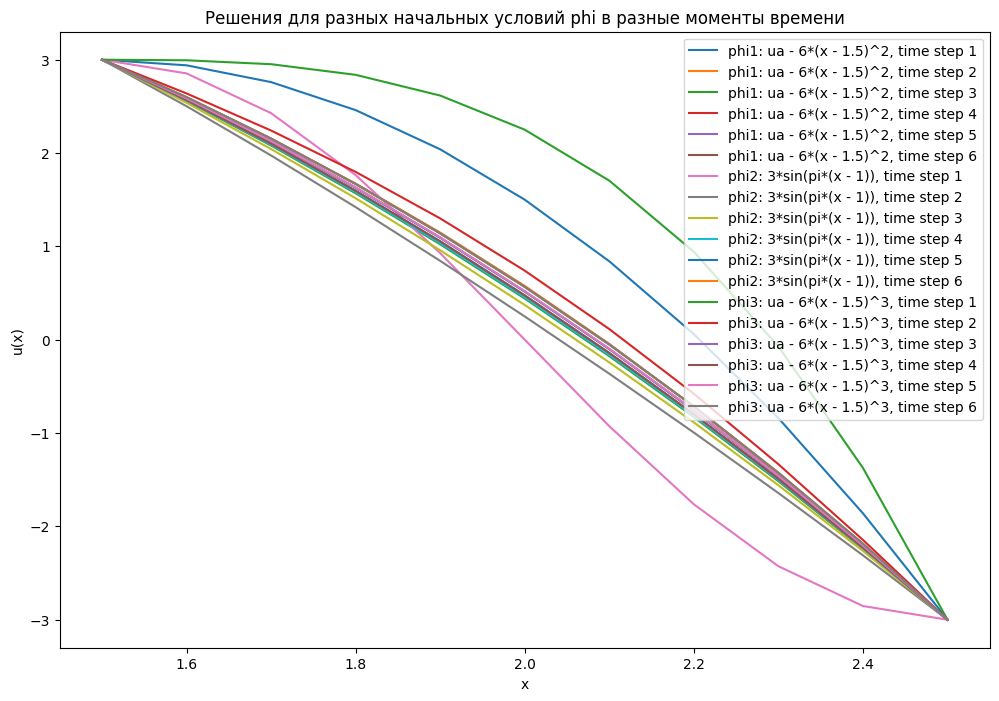

In [31]:
# Определение начальных функций phi
phi1 = lambda x: ua - 6 * ((x - 1.5) ** 2)
phi2 = lambda x: 3 * np.sin(np.pi * (x - 1))
phi3 = lambda x: ua - 6 * ((x - 1.5) ** 3)

def solver_Ex_simple(phi):
    """
    Реализация явной разностной схемы для приближенного решения
    параболического уравнения для произвольной функции phi(x).
    """
    Nt = int(T / tau)
    u = np.zeros(Nx + 1)  # Итоговый результат
    u_n = np.zeros(Nx + 1)  # Шаговой результат
    t = np.linspace(T0, T, Nt + 1)

    # Устанавливаем начальные условия u(x,0) = phi(x)
    for i in range(0, Nx + 1):
        u_n[i] = phi(x[i])

    # Массив для хранения решений в разные моменты времени
    solutions = [u_n.copy()]

    # Прокручиваем временные шаги
    for n in range(1, Nt):
        current_time = n * tau  # Текущее время

        # Вычисляем приближенное решение во внутренних узлах сетки
        for i in range(1, Nx):
            u[i] = u_n[i] + tau * (k(x[i + 1]) * u_n[i + 1] - 2 * k(x[i]) * u_n[i] + k(x[i - 1]) * u_n[i - 1]) / (h**2) + tau * f(x[i], current_time)

        # Граничные условия
        u[0] = ua
        u[Nx] = ub

        # Обновляем переменные перед следующим шагом
        u_n, u = u, u_n

        # Сохраняем решения на каждом шаге времени
        if n % (Nt // 5) == 0:  # Сохраняем решение 5 раз за процесс
            solutions.append(u_n.copy())

    return solutions, x

# Массив начальных функций
phi_array = [phi1, phi2, phi3]
phi_labels = ['phi1: ua - 6*(x - 1.5)^2', 'phi2: 3*sin(pi*(x - 1))', 'phi3: ua - 6*(x - 1.5)^3']

# Построение решений для разных начальных условий
plt.figure(figsize=(12, 8))

for j, phi in enumerate(phi_array):
    solutions, x = solver_Ex_simple(phi)

    # Для каждого phi строим графики через несколько временных шагов
    for i, u in enumerate(solutions):
        plt.plot(x, u, label=f'{phi_labels[j]}, time step {i+1}')

plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend(loc='upper right')
plt.title('Решения для разных начальных условий phi в разные моменты времени')
plt.show()
